### Load Precomputed Data Objects for each Dataset

In [10]:
import os
import pickle

from do_GEOM import GEOM
from do_QM9 import QM9
from do_PDBBIND import PDBBIND
from do_BINDINGMOAD import BINDINGMOAD
from do_CROSSDOCKED import CROSSDOCKED

In [11]:
# geom_data_object_pkl            = 'data_object_cache/GEOM_C1_data_object.pkl'
geom_data_object_pkl            = 'data_object_cache/GEOM_C30_data_object.pkl'
qm9_data_object_pkl             = 'data_object_cache/QM9_data_object.pkl'
pdbbind_ligand_data_object_pkl  = 'data_object_cache/PDBBIND_LIGAND_data_object.pkl'
pdbbind_pocket_data_object_pkl  = 'data_object_cache/PDBBIND_POCKET_data_object.pkl'
pdbbind_protein_data_object_pkl = 'data_object_cache/PDBBIND_PROTEIN_data_object.pkl'
# joined_geom_qm9_data_object_pkl = 'data_object_cache/JOINED_GEOM_QM9_data_object.pkl'
moad_ligand_data_object_pkl     = 'data_object_cache/BINDINGMOAD_LIGAND_data_object.pkl'
moad_pocket_data_object_pkl     = 'data_object_cache/BINDINGMOAD_POCKET_10.0A_data_object.pkl'
crossd_ligand_data_object_pkl   = 'data_object_cache/CROSSDOCKED_LIGAND_data_object.pkl'
crossd_pocket_data_object_pkl   = 'data_object_cache/CROSSDOCKED_POCKET_10.0A_data_object.pkl'

with open(geom_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    geom_data_obj = pickle.load(file)

with open(qm9_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    qm9_data_obj = pickle.load(file)

with open(pdbbind_ligand_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    pdbbind_ligand_data_obj = pickle.load(file)

with open(pdbbind_pocket_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    pdbbind_pocket_data_obj = pickle.load(file)

with open(pdbbind_protein_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    pdbbind_protein_data_obj = pickle.load(file)

# with open(joined_geom_qm9_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
#     joined_geom_qm9_data_obj = pickle.load(file)

with open(moad_ligand_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    moad_ligand_data_obj = pickle.load(file)

with open(moad_pocket_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    moad_pocket_data_obj = pickle.load(file)

with open(crossd_ligand_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    crossd_ligand_data_obj = pickle.load(file)

with open(crossd_pocket_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    crossd_pocket_data_obj = pickle.load(file)


In [12]:
print(f"QM9        : {qm9_data_obj.mol_count}")
print(f"GEOM       : {geom_data_obj.mol_count}")

print(f"PDBB-LG    : {pdbbind_ligand_data_obj.mol_count}")
print(f"PDBB-PKT   : {pdbbind_pocket_data_obj.mol_count}")
print(f"PDBB-PTN   : {pdbbind_protein_data_obj.mol_count}")

print(f"MOAD-LG    : {moad_ligand_data_obj.mol_count}")
print(f"MOAD-PKT   : {moad_pocket_data_obj.mol_count}")

print(f"CrossD-LG  : {crossd_ligand_data_obj.mol_count}")
print(f"CrossD-PKT : {crossd_pocket_data_obj.mol_count}")

QM9        : 133885
GEOM       : 6922516
PDBB-LG    : 5316
PDBB-PKT   : 5316
PDBB-PTN   : 5316
MOAD-LG    : 79043
MOAD-PKT   : 79043
CrossD-LG  : 100030
CrossD-PKT : 100030


### View each atom's frequencies in each dataset

In [13]:
from constants import get_periodictable_list
an2s, s2an = get_periodictable_list()


all_unique_atoms = list(set(
    list(geom_data_obj.atomic_num_freq.keys()) + \
    list(qm9_data_obj.atomic_num_freq.keys()) + \
    list(pdbbind_ligand_data_obj.atomic_num_freq.keys()) + \
    list(pdbbind_pocket_data_obj.atomic_num_freq.keys()) + \
    list(pdbbind_protein_data_obj.atomic_num_freq.keys()) + \
    list(moad_ligand_data_obj.atomic_num_freq.keys()) + \
    list(moad_pocket_data_obj.atomic_num_freq.keys()) + \
    list(crossd_ligand_data_obj.atomic_num_freq.keys()) + \
    list(crossd_pocket_data_obj.atomic_num_freq.keys())
))
all_unique_atoms_symbols = [str(an2s[int(an)]) for an in all_unique_atoms]

list_of_all_dicts = [qm9_data_obj.atomic_num_freq, \
                     geom_data_obj.atomic_num_freq, \
                     pdbbind_ligand_data_obj.atomic_num_freq, \
                     pdbbind_pocket_data_obj.atomic_num_freq, \
                     pdbbind_protein_data_obj.atomic_num_freq, \
                     moad_ligand_data_obj.atomic_num_freq, \
                     moad_pocket_data_obj.atomic_num_freq, \
                     crossd_ligand_data_obj.atomic_num_freq, \
                     crossd_pocket_data_obj.atomic_num_freq
                    ]
list_of_all_dicts_names = ['QM9', 'GEOM', 'PDBB-LG', 'PDBB-PKT', 'PDBB-PTN', 'MOAD-LG', 'MOAD-PKT', 'CrossD-LG', 'CrossD-PKT']
colors = ['skyblue', 'salmon', 'green', 'purple', 'brown', 'yellow', 'orange', 'magenta', 'red']


In [14]:
# ! pip install prettytable
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Keys'] + all_unique_atoms_symbols

# populate table rows
for dictionary, name in zip(list_of_all_dicts, list_of_all_dicts_names):
    values = [dictionary.get(key, 0) for key in all_unique_atoms]
    # values = [int(dictionary.get(key, 0) > 0) for key in all_unique_atoms]
    table.add_row([name] + values)

print(table)

# save to txt file
with open('outputs/atom_freq.txt', 'w') as f:
    print(table, file=f)


+------------+-----------+----+-----+-----------+----------+----------+---------+-----+-----+----+-----+-------+---------+---------+-----+------+-----+----+----+----+----+------+----+-----+--------+----+-----+------+----+----+----+
|    Keys    |     H     | Li |  B  |     C     |    N     |    O     |    F    |  Na |  Mg | Al |  Si |   P   |    S    |    Cl   |  K  |  Ca  |  Mn | Fe | Co | Ni | Cu |  Zn  | As |  Se |   Br   | Sr |  Cd |  I   | Cs | Hg | Bi |
+------------+-----------+----+-----+-----------+----------+----------+---------+-----+-----+----+-----+-------+---------+---------+-----+------+-----+----+----+----+----+------+----+-----+--------+----+-----+------+----+----+----+
|    QM9     |  1230122  | 0  |  0  |   846557  |  139764  |  187996  |   3314  |  0  |  0  | 0  |  0  |   0   |    0    |    0    |  0  |  0   |  0  | 0  | 0  | 0  | 0  |  0   | 0  |  0  |   0    | 0  |  0  |  0   | 0  | 0  | 0  |
|    GEOM    | 143905848 | 0  | 290 | 129988623 | 20266722 | 21669359 | 

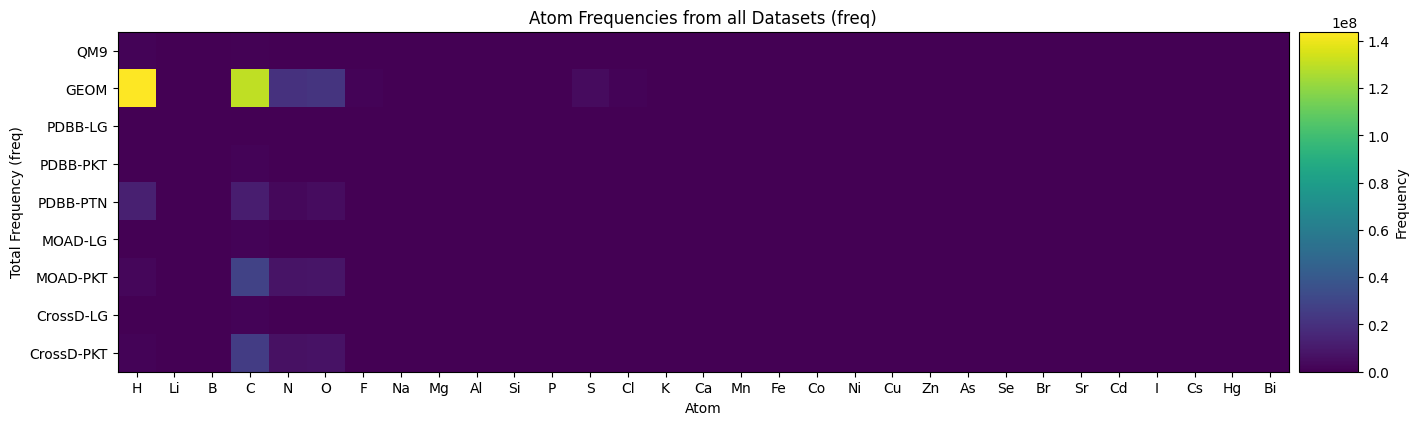

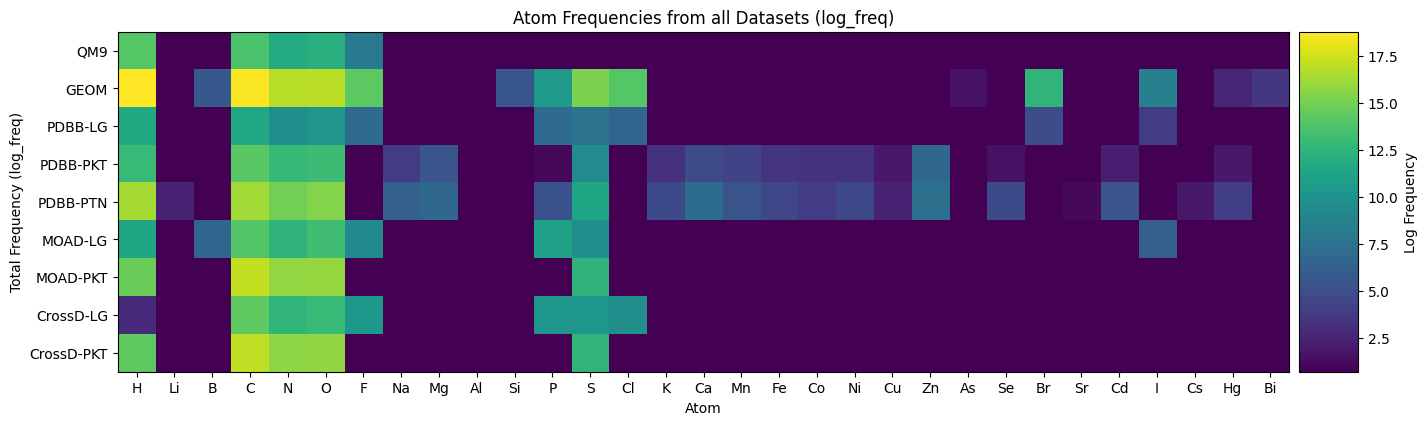

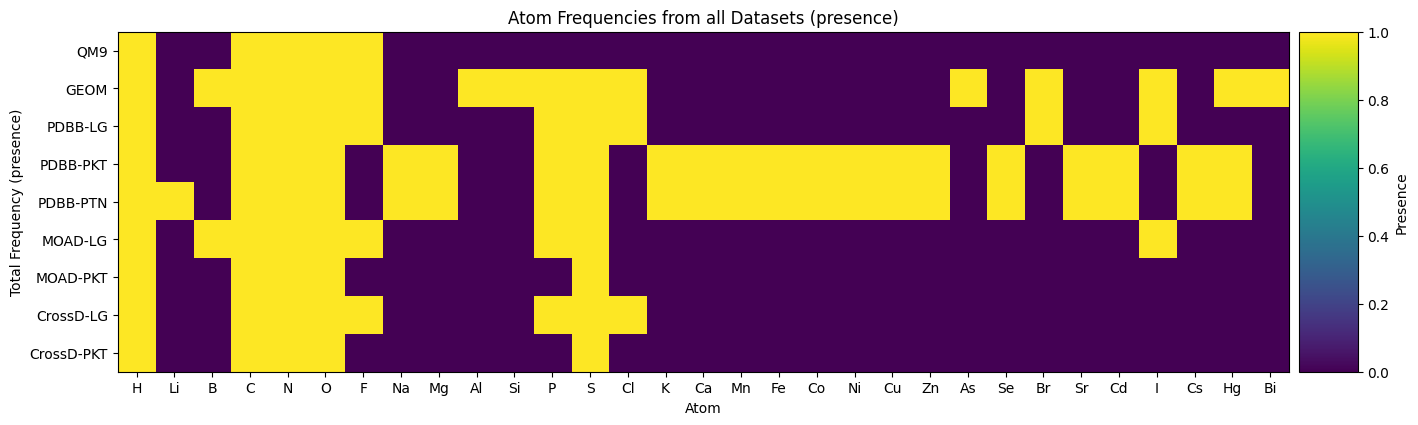

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_atom_freq_heatmap(mode='presence', img_save_path=''):
    matrix = []
    for dictionary in list_of_all_dicts:
        if mode == 'freq':
            row = [dictionary.get(key, 0) for key in all_unique_atoms]
        elif mode == 'log_freq':
            row = [math.log(dictionary.get(key, 1) + 1) for key in all_unique_atoms]
        elif mode == 'presence':
            row = [int(dictionary.get(key, 0) > 0) for key in all_unique_atoms]
        matrix.append(row)

    matrix = np.array(matrix)

    fig, ax = plt.subplots(figsize=(16, 12))
    im = ax.imshow(matrix, cmap='viridis', interpolation='nearest')

    ax.set_xticks(np.arange(len(all_unique_atoms_symbols)))
    ax.set_xticklabels(all_unique_atoms_symbols)
    ax.set_yticks(np.arange(len(list_of_all_dicts)))
    ax.set_yticklabels(list_of_all_dicts_names)
    ax.set_xlabel('Atom')
    ax.set_ylabel(f'Total Frequency ({mode})')
    ax.set_title(f'Atom Frequencies from all Datasets ({mode})')

    # Create an axes on the right side of ax. The width of cax will be 5% of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('Frequency' if mode == 'freq' else 'Log Frequency' if mode == 'log_freq' else 'Presence')

    plt.savefig(img_save_path)
    plt.show()

# def plot_atom_freq_heatmap(mode='presence', img_save_path=''):
#     matrix = []
#     for dictionary in list_of_all_dicts:
#         if mode == 'freq':
#             row = [dictionary.get(key, 0) for key in all_unique_atoms]
#         elif mode == 'log_freq':
#             row = [math.log(dictionary.get(key, 1) + 1) for key in all_unique_atoms]
#         elif mode == 'presence':
#             row = [int(dictionary.get(key, 0) > 0) for key in all_unique_atoms]
#         matrix.append(row)

#     matrix = np.array(matrix)

#     plt.figure(figsize=(16, 12))
#     im = plt.imshow(matrix, cmap='viridis', interpolation='nearest')

#     plt.xticks(np.arange(len(all_unique_atoms_symbols)), all_unique_atoms_symbols)
#     plt.yticks(np.arange(len(list_of_all_dicts)), list_of_all_dicts_names)
#     plt.xlabel('Atom')
#     plt.ylabel(f'Total Frequency ({mode})')
#     plt.title(f'Atom Frequencies from all Datasets ({mode})')
    
#     cbar = plt.colorbar(im)
#     cbar.set_label('Frequency' if mode == 'freq' else 'Log Frequency' if mode == 'log_freq' else 'Presence')


#     # plt.colorbar(label='')
#     plt.savefig(img_save_path)
#     plt.show()

plot_atom_freq_heatmap(mode='freq', img_save_path='outputs/atom_freq.png')
plot_atom_freq_heatmap(mode='log_freq', img_save_path='outputs/atom_freq_log_scale.png')
plot_atom_freq_heatmap(mode='presence', img_save_path='outputs/atom_freq_presence.png')

### Number of Atoms per Molecule Stats

In [16]:
from utils import get_min_max_mean_std

data_num_atoms = [qm9_data_obj.num_atoms,
                 geom_data_obj.num_atoms,
                 pdbbind_ligand_data_obj.num_atoms,
                 pdbbind_pocket_data_obj.num_atoms,
                 pdbbind_protein_data_obj.num_atoms,
                 moad_ligand_data_obj.num_atoms,
                 moad_pocket_data_obj.num_atoms,
                 crossd_ligand_data_obj.num_atoms,
                 crossd_pocket_data_obj.num_atoms
                 ]

data_num_atoms_no_H = [qm9_data_obj.num_atoms_no_H,
                       geom_data_obj.num_atoms_no_H,
                       pdbbind_ligand_data_obj.num_atoms_no_H,
                       pdbbind_pocket_data_obj.num_atoms_no_H,
                       pdbbind_protein_data_obj.num_atoms_no_H,
                       moad_ligand_data_obj.num_atoms_no_H,
                       moad_pocket_data_obj.num_atoms_no_H,
                       crossd_ligand_data_obj.num_atoms_no_H,
                       crossd_pocket_data_obj.num_atoms_no_H
                       ]


min_mean_max_std_table = get_min_max_mean_std(data_num_atoms, list_of_all_dicts_names)
print(min_mean_max_std_table)
# save to txt file
with open('outputs/num_atom_min_mean_max_std.txt', 'w') as f:
    print(min_mean_max_std_table, file=f)

min_mean_max_std_table_no_H = get_min_max_mean_std(data_num_atoms_no_H, list_of_all_dicts_names)
print(min_mean_max_std_table_no_H)
# save to txt file
with open('outputs/num_atom_min_mean_max_std_no_H.txt', 'w') as f:
    print(min_mean_max_std_table_no_H, file=f)

min_mean_max_std_table_pkt_num_resi = get_min_max_mean_std([moad_pocket_data_obj.num_resi, crossd_pocket_data_obj.num_resi], ['MOAD-PKT', 'CrossD-PKT'])
print(min_mean_max_std_table_pkt_num_resi)
with open('outputs/pkt_num_resi_min_mean_max_std.txt', 'w') as f:
    print(min_mean_max_std_table_pkt_num_resi, file=f)

+------------+-----+--------------------+-------+--------------------+
|            | Min |        Mean        |  Max  |        Std         |
+------------+-----+--------------------+-------+--------------------+
|    QM9     |  3  | 17.98373977667401  |   29  | 2.954247224380768  |
|    GEOM    |  3  | 46.64165788854804  |  181  | 10.392822543375425 |
|  PDBB-LG   |  8  | 48.54176072234763  |  175  | 24.212758240443513 |
|  PDBB-PKT  | 176 | 496.52332580887884 |  1198 | 116.23134583181526 |
|  PDBB-PTN  | 538 | 6095.708051166291  | 74903 | 6613.167402271161  |
|  MOAD-LG   |  1  | 27.097858127854458 |  177  | 15.100668427380844 |
|  MOAD-PKT  |  0  |  587.412003592981  |  2888 | 239.67967958555008 |
| CrossD-LG  |  3  |  23.6073677896631  |  106  | 8.799046353689125  |
| CrossD-PKT |  11 | 409.68632410276916 |  1719 | 119.9957537317035  |
+------------+-----+--------------------+-------+--------------------+
+------------+-----+--------------------+-------+--------------------+
|     

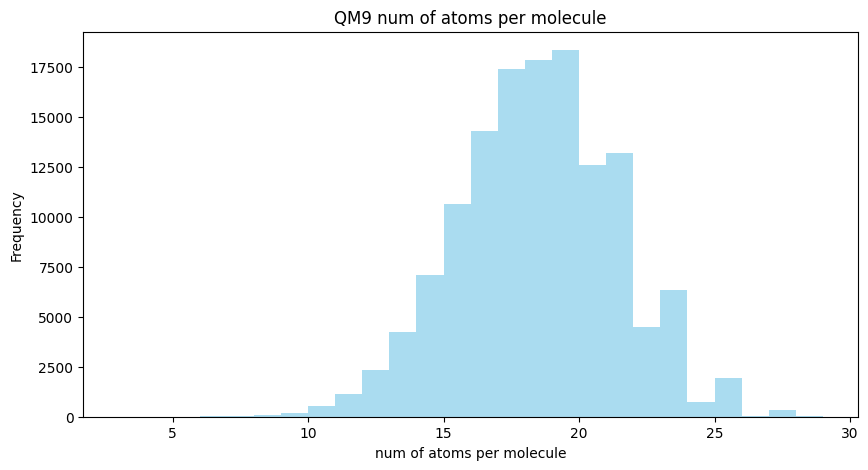

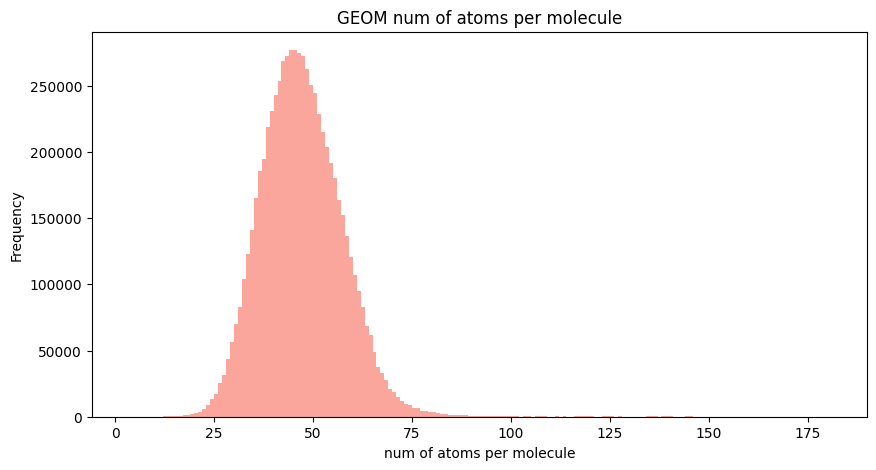

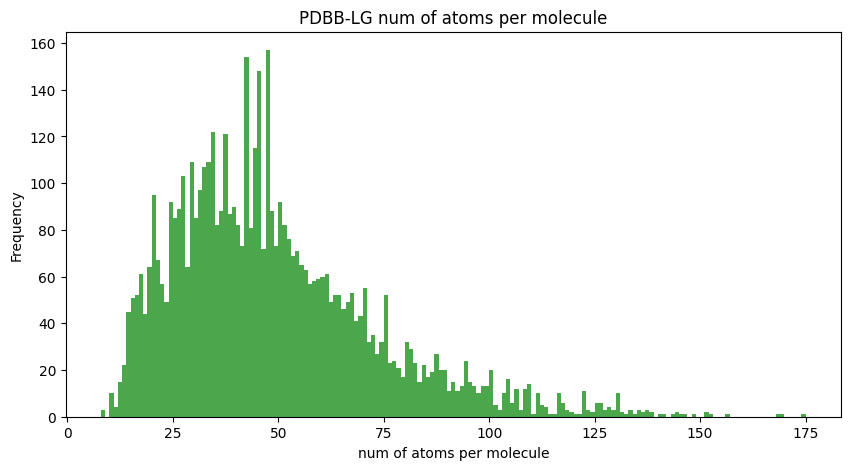

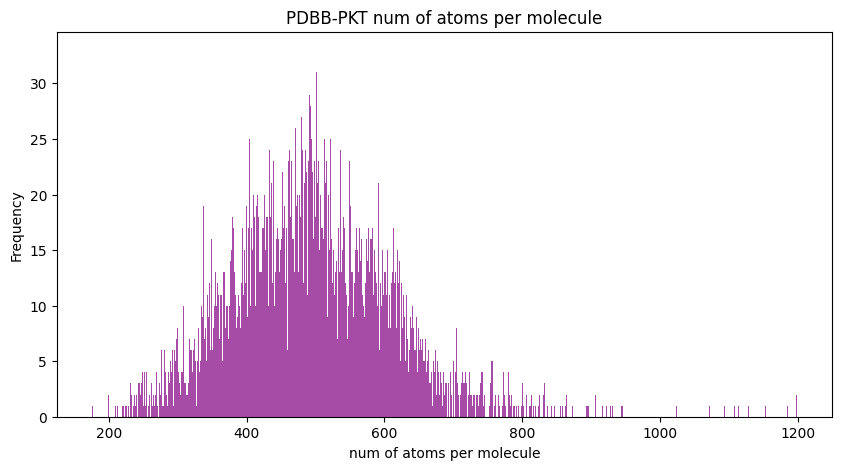

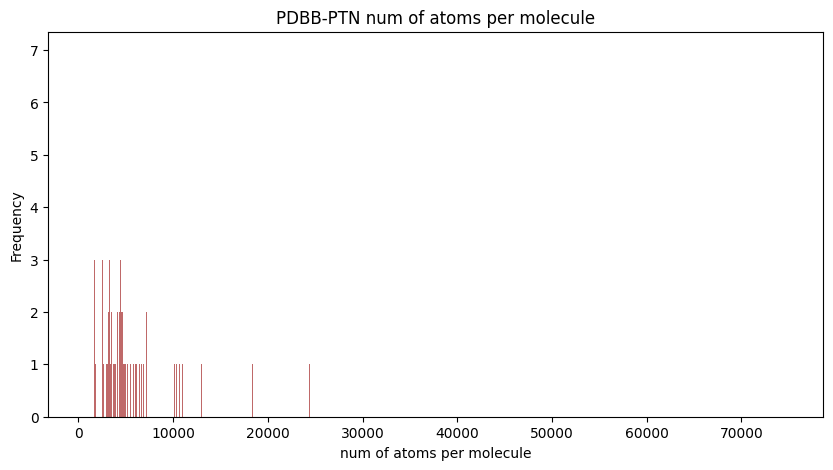

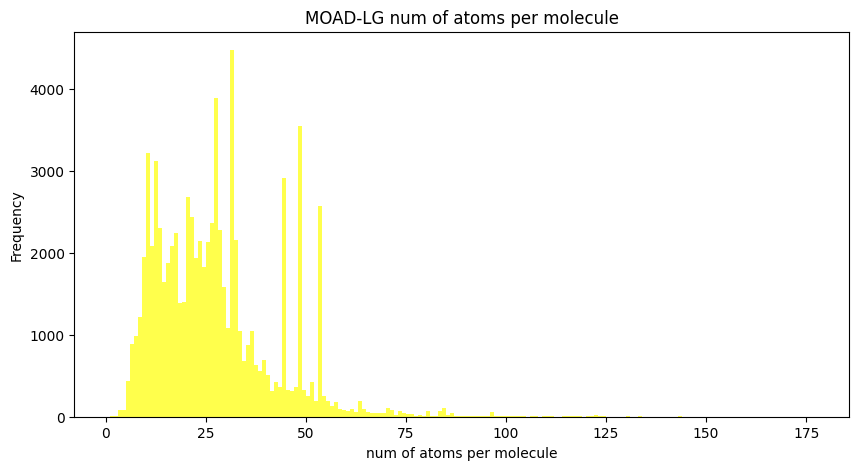

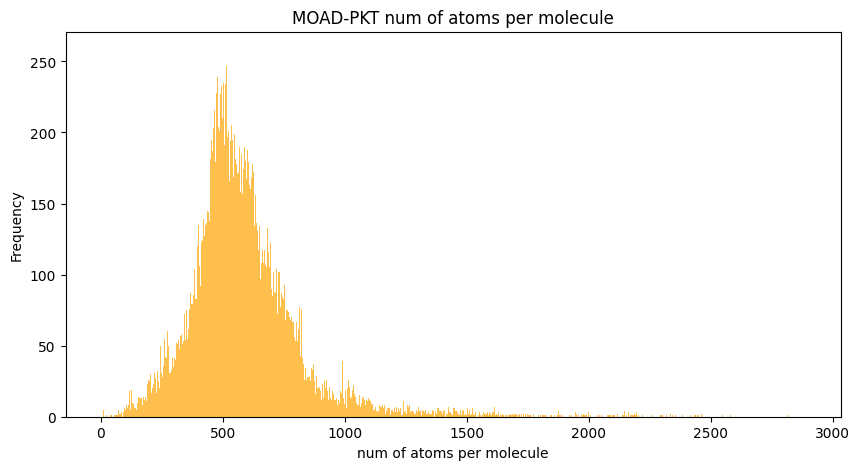

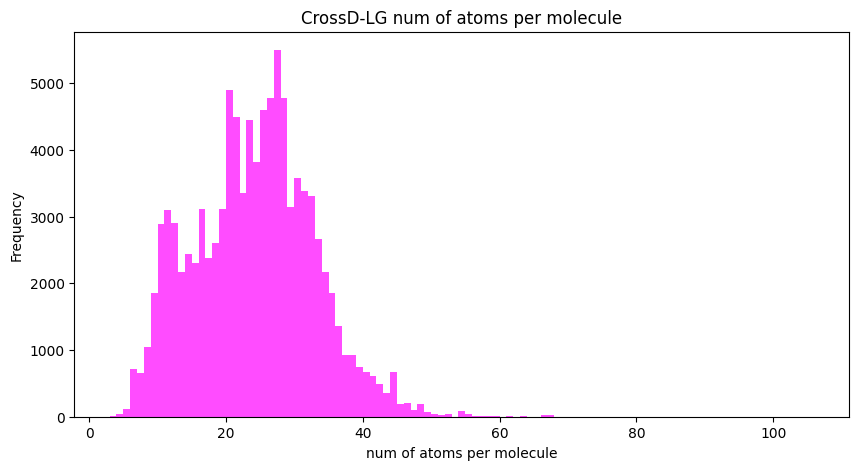

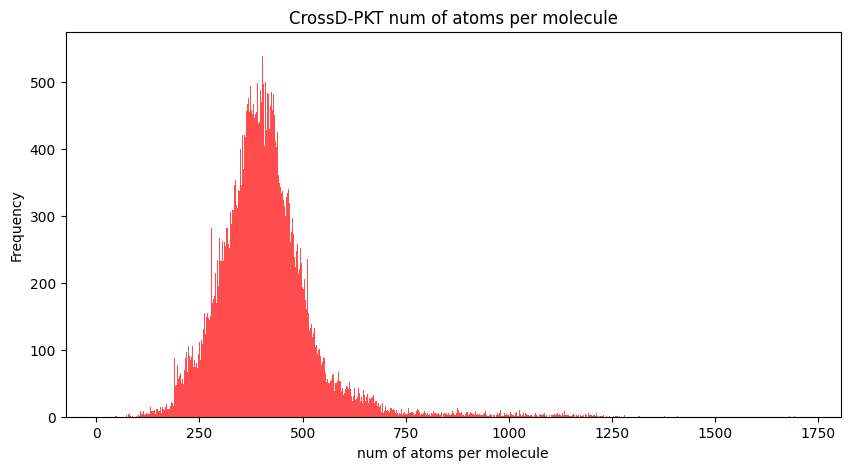

In [17]:
from utils import plot_histogram

plot_histogram(data_list=qm9_data_obj.num_atoms, color=colors[0], label=list_of_all_dicts_names[0], xlabel='num of atoms per molecule', title='QM9 num of atoms per molecule', img_save_path='outputs/num_atom_hist_QM9.png')
plot_histogram(data_list=geom_data_obj.num_atoms, color=colors[1], label=list_of_all_dicts_names[1], xlabel='num of atoms per molecule', title='GEOM num of atoms per molecule', img_save_path='outputs/num_atom_hist_GEOM.png')
plot_histogram(data_list=pdbbind_ligand_data_obj.num_atoms, color=colors[2], label=list_of_all_dicts_names[2], xlabel='num of atoms per molecule', title='PDBB-LG num of atoms per molecule', img_save_path='outputs/num_atom_hist_PDBB-LG.png')
plot_histogram(data_list=pdbbind_pocket_data_obj.num_atoms, color=colors[3], label=list_of_all_dicts_names[3], xlabel='num of atoms per molecule', title='PDBB-PKT num of atoms per molecule', img_save_path='outputs/num_atom_hist_PDBB-PKT.png')
plot_histogram(data_list=pdbbind_protein_data_obj.num_atoms, color=colors[4], label=list_of_all_dicts_names[4], xlabel='num of atoms per molecule', title='PDBB-PTN num of atoms per molecule', img_save_path='outputs/num_atom_hist_PDBB-PTN.png')

plot_histogram(data_list=moad_ligand_data_obj.num_atoms, color=colors[5], label=list_of_all_dicts_names[5], xlabel='num of atoms per molecule', title='MOAD-LG num of atoms per molecule', img_save_path='outputs/num_atom_hist_MOAD-LG.png')
plot_histogram(data_list=moad_pocket_data_obj.num_atoms, color=colors[6], label=list_of_all_dicts_names[6], xlabel='num of atoms per molecule', title='MOAD-PKT num of atoms per molecule', img_save_path='outputs/num_atom_hist_MOAD-PKT.png')

plot_histogram(data_list=crossd_ligand_data_obj.num_atoms, color=colors[7], label=list_of_all_dicts_names[7], xlabel='num of atoms per molecule', title='CrossD-LG num of atoms per molecule', img_save_path='outputs/num_atom_hist_CrossD-LG.png')
plot_histogram(data_list=crossd_pocket_data_obj.num_atoms, color=colors[8], label=list_of_all_dicts_names[8], xlabel='num of atoms per molecule', title='CrossD-PKT num of atoms per molecule', img_save_path='outputs/num_atom_hist_CrossD-PKT.png')

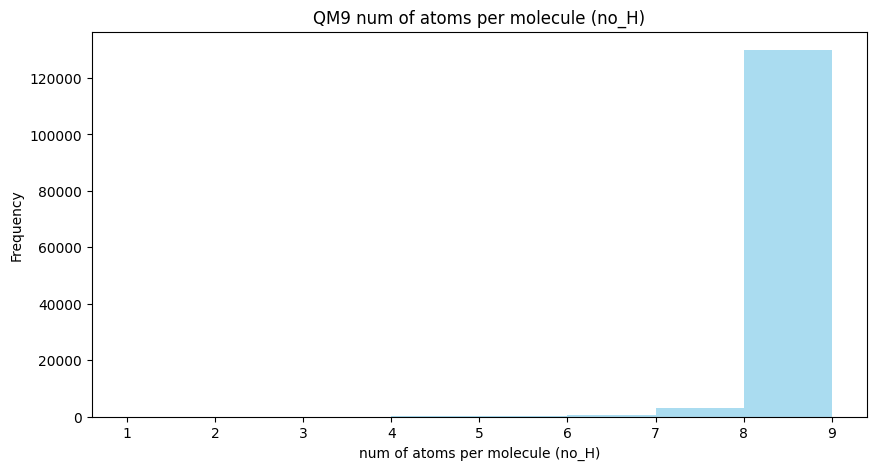

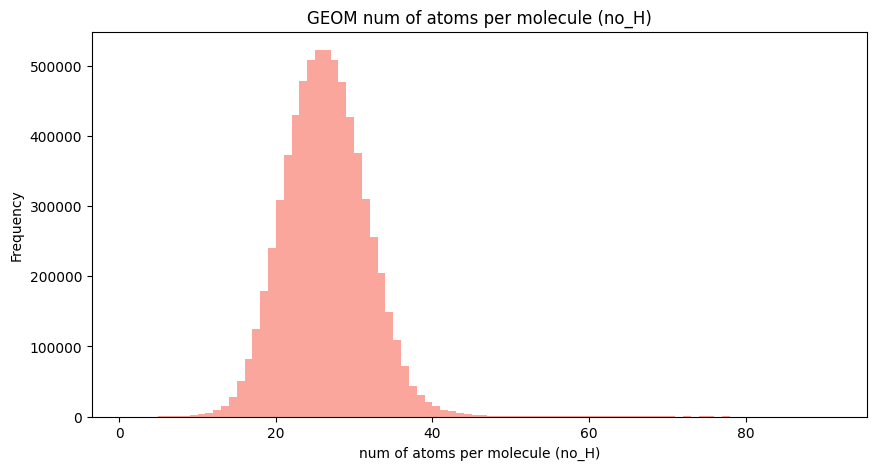

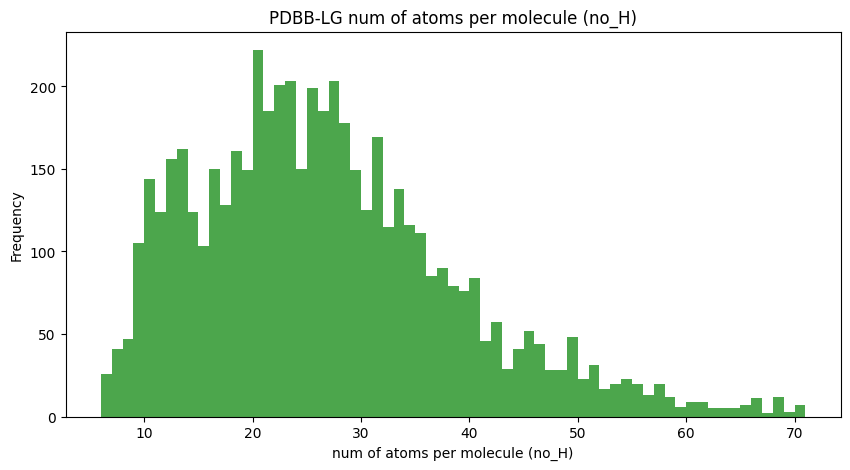

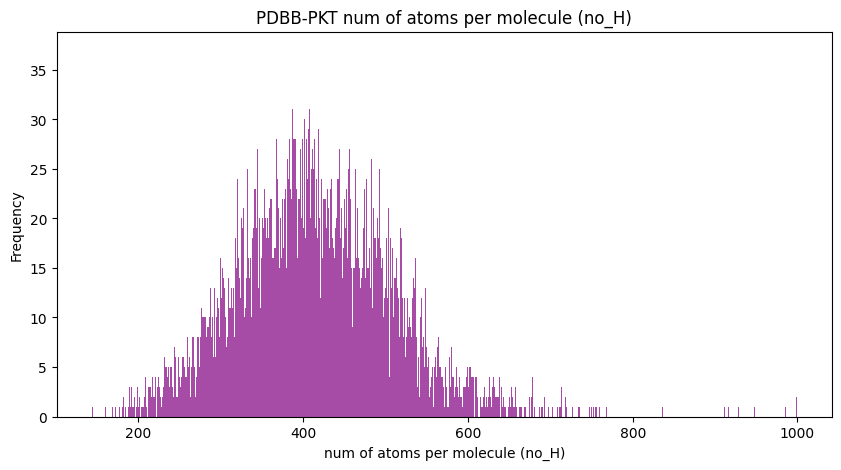

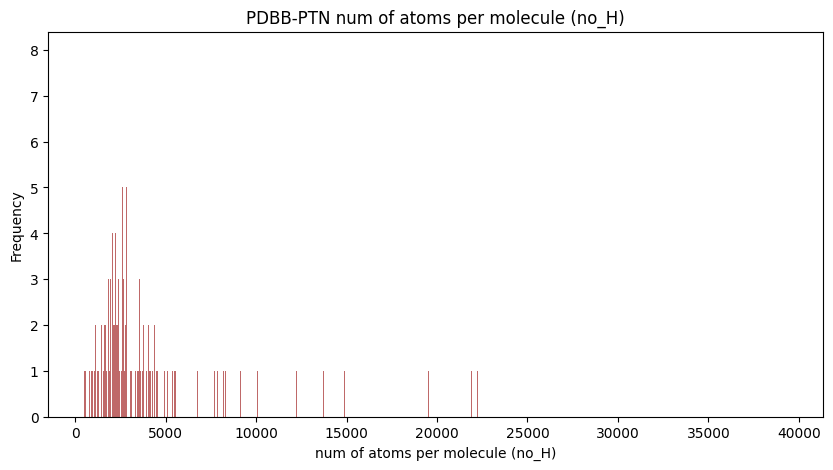

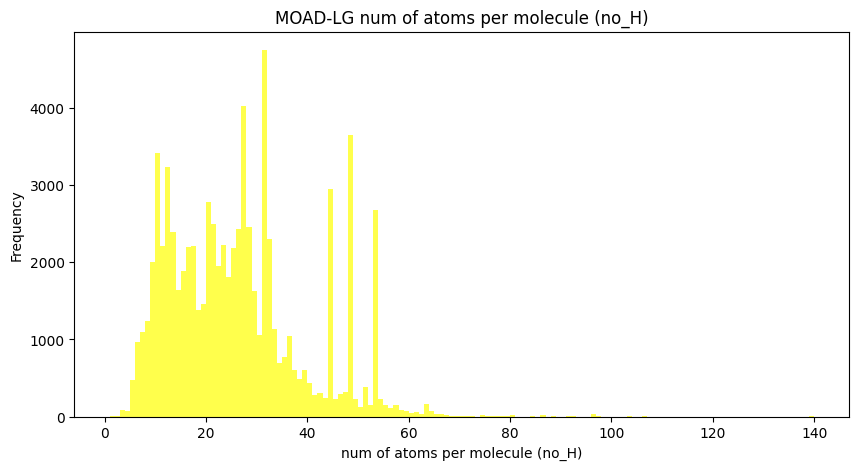

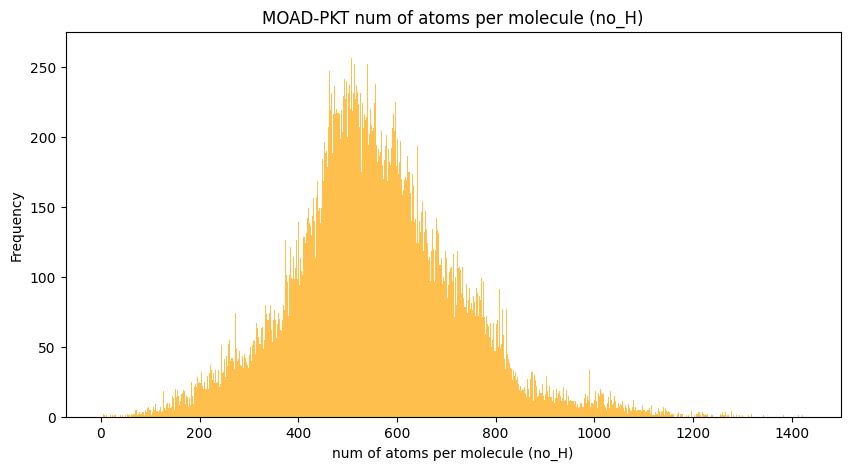

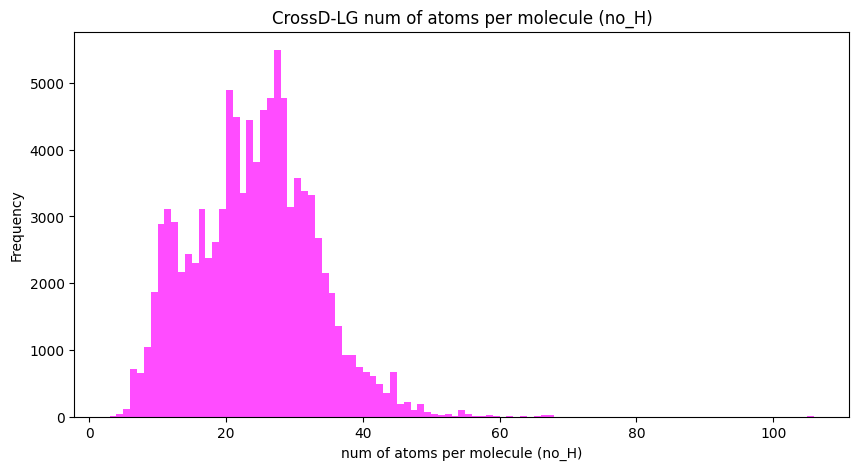

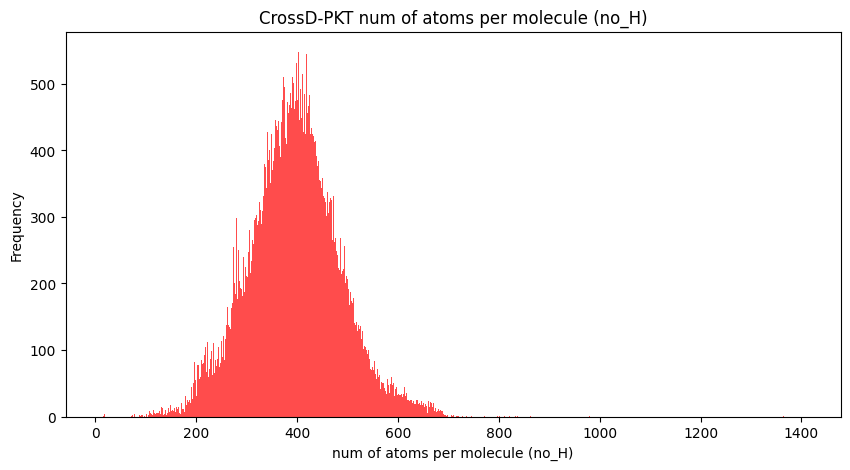

In [18]:
from utils import plot_histogram

plot_histogram(data_list=qm9_data_obj.num_atoms_no_H, color=colors[0], label=list_of_all_dicts_names[0], xlabel='num of atoms per molecule (no_H)', title='QM9 num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_QM9_no_H.png')
plot_histogram(data_list=geom_data_obj.num_atoms_no_H, color=colors[1], label=list_of_all_dicts_names[1], xlabel='num of atoms per molecule (no_H)', title='GEOM num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_GEOM_no_H.png')
plot_histogram(data_list=pdbbind_ligand_data_obj.num_atoms_no_H, color=colors[2], label=list_of_all_dicts_names[2], xlabel='num of atoms per molecule (no_H)', title='PDBB-LG num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_PDBB-LG_no_H.png')
plot_histogram(data_list=pdbbind_pocket_data_obj.num_atoms_no_H, color=colors[3], label=list_of_all_dicts_names[3], xlabel='num of atoms per molecule (no_H)', title='PDBB-PKT num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_PDBB-PKT_no_H.png')
plot_histogram(data_list=pdbbind_protein_data_obj.num_atoms_no_H, color=colors[4], label=list_of_all_dicts_names[4], xlabel='num of atoms per molecule (no_H)', title='PDBB-PTN num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_PDBB-PTN_no_H.png')

plot_histogram(data_list=moad_ligand_data_obj.num_atoms_no_H, color=colors[5], label=list_of_all_dicts_names[5], xlabel='num of atoms per molecule (no_H)', title='MOAD-LG num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_MOAD-LG_no_H.png')
plot_histogram(data_list=moad_pocket_data_obj.num_atoms_no_H, color=colors[6], label=list_of_all_dicts_names[6], xlabel='num of atoms per molecule (no_H)', title='MOAD-PKT num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_MOAD-PKT_no_H.png')

plot_histogram(data_list=crossd_ligand_data_obj.num_atoms_no_H, color=colors[7], label=list_of_all_dicts_names[7], xlabel='num of atoms per molecule (no_H)', title='CrossD-LG num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_CrossD-LG_no_H.png')
plot_histogram(data_list=crossd_pocket_data_obj.num_atoms_no_H, color=colors[8], label=list_of_all_dicts_names[8], xlabel='num of atoms per molecule (no_H)', title='CrossD-PKT num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_CrossD-PKT_no_H.png')

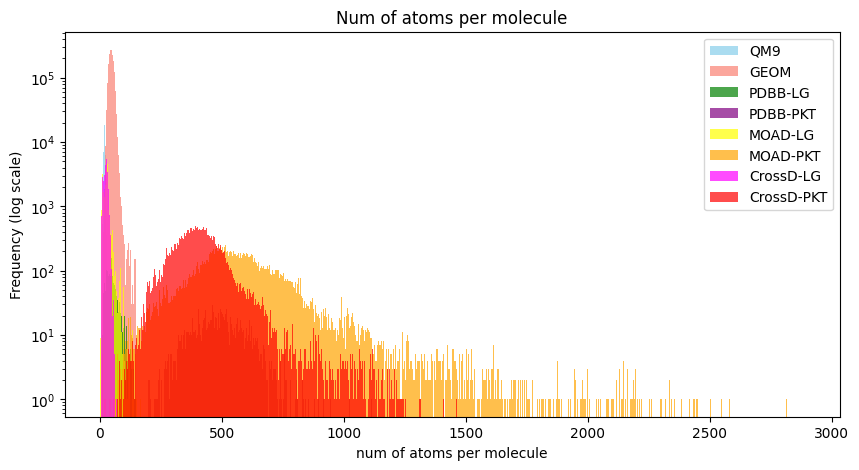

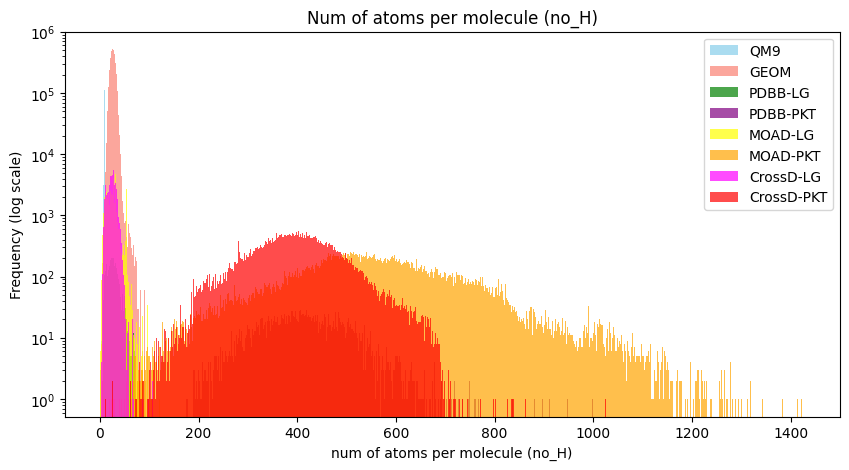

In [19]:
# this might take some time (PDBB-PTN)

from utils import plot_combined_histogram

plot_combined_histogram(data_num_atoms[:4]+data_num_atoms[5:], colors[:4]+colors[5:], list_of_all_dicts_names[:4]+list_of_all_dicts_names[5:], title='Num of atoms per molecule', xlabel='num of atoms per molecule', img_save_path='outputs/num_atom_hist_ALL.png', log=True)
plot_combined_histogram(data_num_atoms_no_H[:4]+data_num_atoms_no_H[5:], colors[:4]+colors[5:], list_of_all_dicts_names[:4]+list_of_all_dicts_names[5:], title='Num of atoms per molecule (no_H)', xlabel='num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_ALL_no_H.png', log=True)

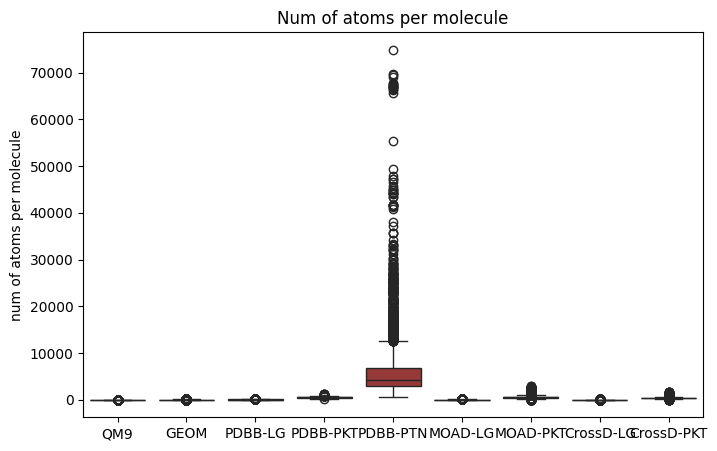

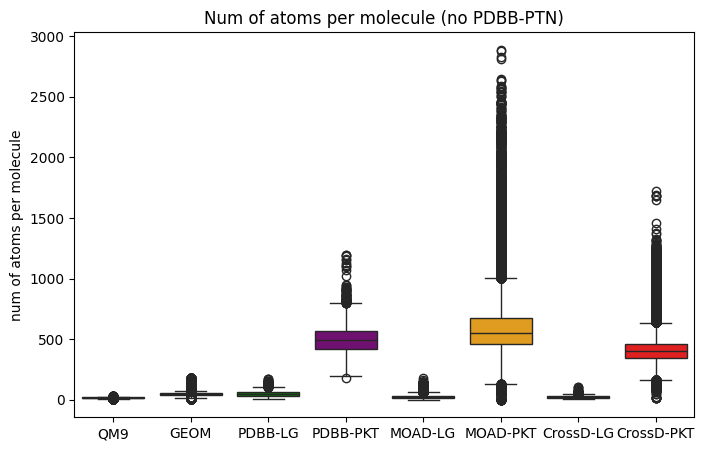

In [20]:
from utils import plot_combined_boxplot

plot_combined_boxplot(data_num_atoms, colors, list_of_all_dicts_names, ylabel='num of atoms per molecule', title='Num of atoms per molecule', img_save_path='outputs/num_atom_box_ALL.png')
plot_combined_boxplot(data_num_atoms[:4]+data_num_atoms[5:], colors[:4]+colors[5:], list_of_all_dicts_names[:4]+list_of_all_dicts_names[5:], ylabel='num of atoms per molecule', title='Num of atoms per molecule (no PDBB-PTN)', img_save_path='outputs/num_atom_box_ALL_no_PDBB-PTN.png')


In [21]:
from utils import all_vs_all_welch_t_test

p_table_num_atom, t_table_num_atom = all_vs_all_welch_t_test(data_num_atoms, list_of_all_dicts_names, alpha=0.05)

print(p_table_num_atom, '\n\n', t_table_num_atom)

# save to txt file
with open('outputs/num_atom_stats_t_test.txt', 'w') as f:
    print(p_table_num_atom, file=f)
    print('\n\n', file=f)
    print(t_table_num_atom, file=f)


+----------------+-----------+------------------------------+------------------------------+-----------+-----------+-----------+-----------+-----------+------------+
| (P) Alpha:0.05 |    QM9    |             GEOM             |           PDBB-LG            |  PDBB-PKT |  PDBB-PTN |  MOAD-LG  |  MOAD-PKT | CrossD-LG | CrossD-PKT |
+----------------+-----------+------------------------------+------------------------------+-----------+-----------+-----------+-----------+-----------+------------+
|      QM9       |     -     |          0.0 (Sig)           |          0.0 (Sig)           | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig)  |
|      GEOM      | 0.0 (Sig) |              -               | 1.1184177110424497e-08 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig)  |
|    PDBB-LG     | 0.0 (Sig) | 1.1184177110424497e-08 (Sig) |              -               | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig)  |
|   

### Molecule Size (Radius) Stats

In [22]:
from utils import get_min_max_mean_std

data_max_radius = [qm9_data_obj.radius_max,
                   geom_data_obj.radius_max,
                   pdbbind_ligand_data_obj.radius_max,
                   pdbbind_pocket_data_obj.radius_max,
                   pdbbind_protein_data_obj.radius_max,
                   moad_ligand_data_obj.radius_max,
                   moad_pocket_data_obj.radius_max,
                   crossd_ligand_data_obj.radius_max,
                   crossd_pocket_data_obj.radius_max
                   ]


min_mean_max_std_table = get_min_max_mean_std(data_max_radius, list_of_all_dicts_names)

print(min_mean_max_std_table)
# save to txt file
with open('outputs/radius_max_min_mean_max_std.txt', 'w') as f:
    print(min_mean_max_std_table, file=f)


+------------+--------------------+--------------------+--------------------+--------------------+
|            |        Min         |        Mean        |        Max         |        Std         |
+------------+--------------------+--------------------+--------------------+--------------------+
|    QM9     | 0.7821731533417068 | 3.604329397357175  | 7.4042503239529305 | 0.5695761525434165 |
|    GEOM    | 0.795144795852282  | 6.788726972503493  | 20.595885881032522 | 1.1949492714384649 |
|  PDBB-LG   | 1.977430442321238  | 7.221951774126566  | 18.759566582365718 | 2.3559283304664125 |
|  PDBB-PKT  | 11.616039987700573 | 17.95236954728978  | 28.902910028633812 | 2.0148244655801215 |
|  PDBB-PTN  | 20.002584003357686 | 38.921809495924045 | 103.72260785621509 | 10.73730910971066  |
|  MOAD-LG   | 2.5129082202911377 | 167.55390809529518 |  5486.51611328125  | 169.12373403968863 |
|  MOAD-PKT  |        0.0         | 814.7075676663151  |   19458.6484375    |  774.168122458724  |
| CrossD-L

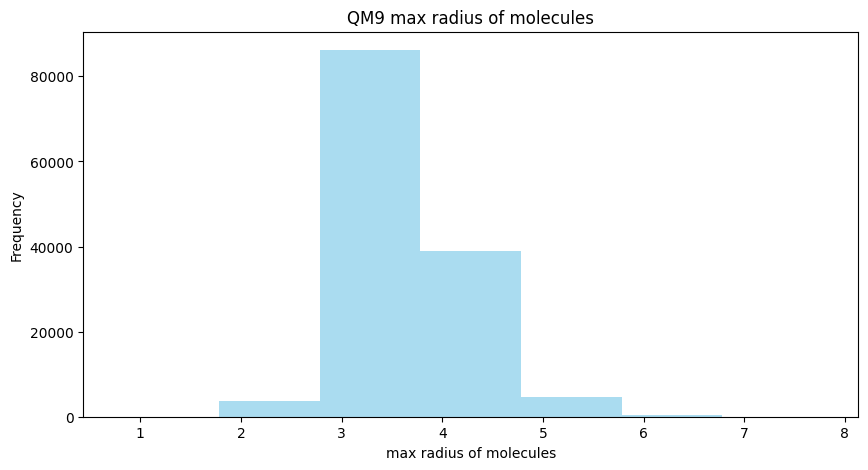

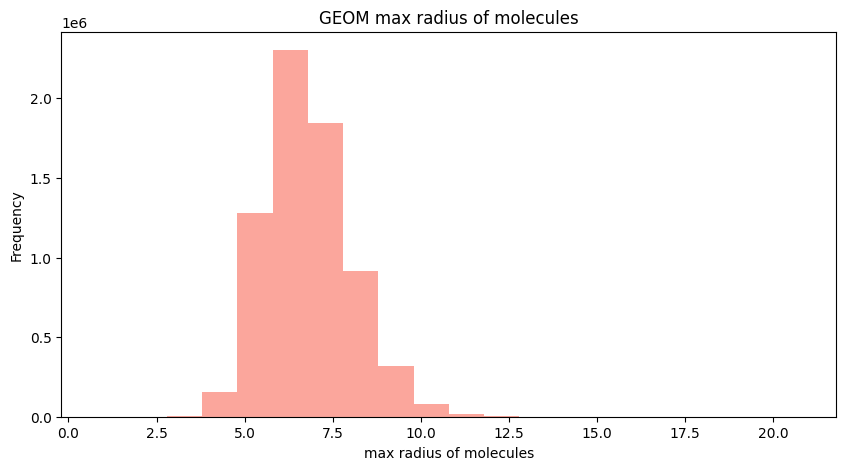

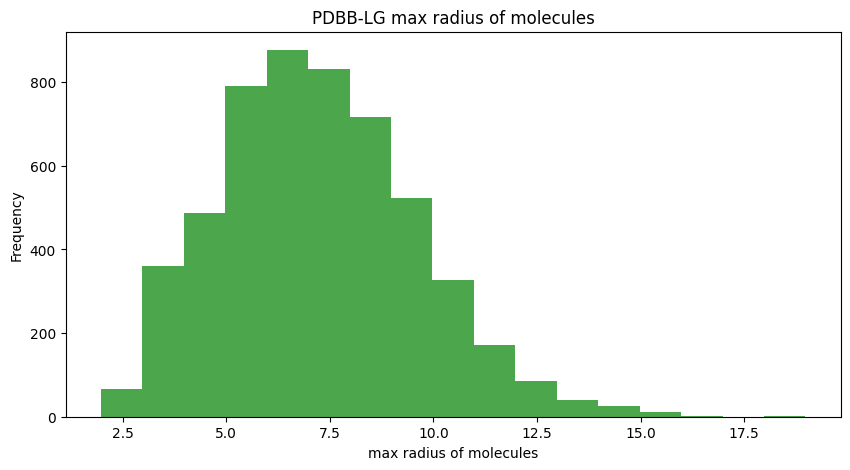

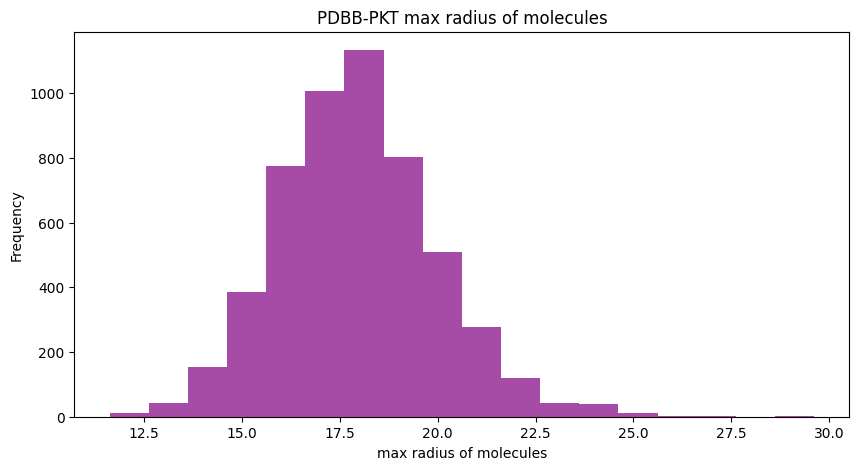

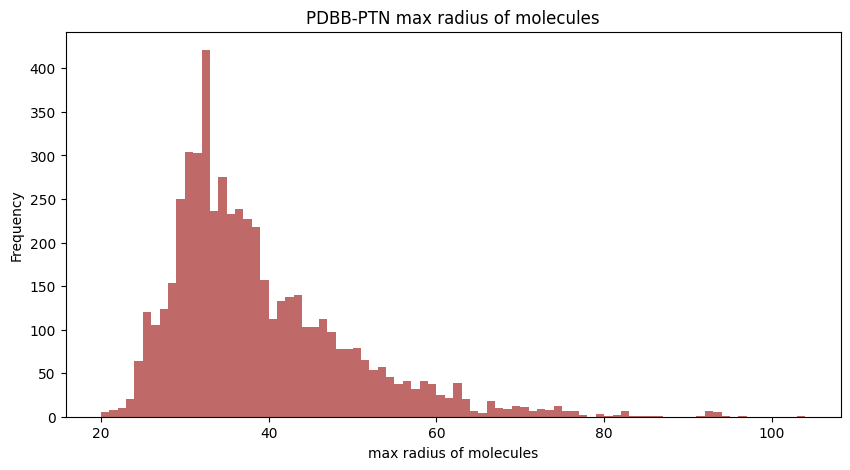

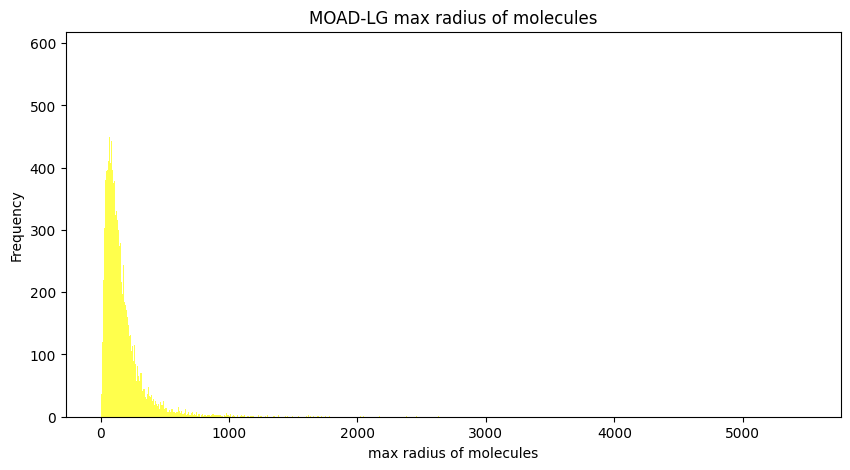

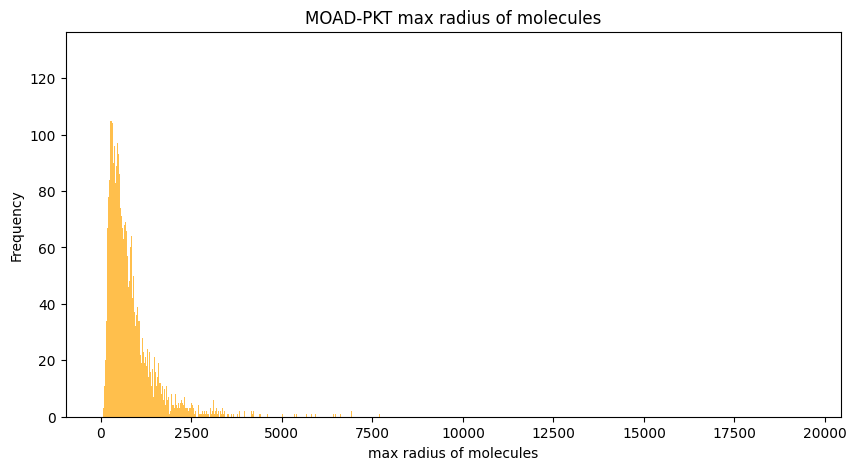

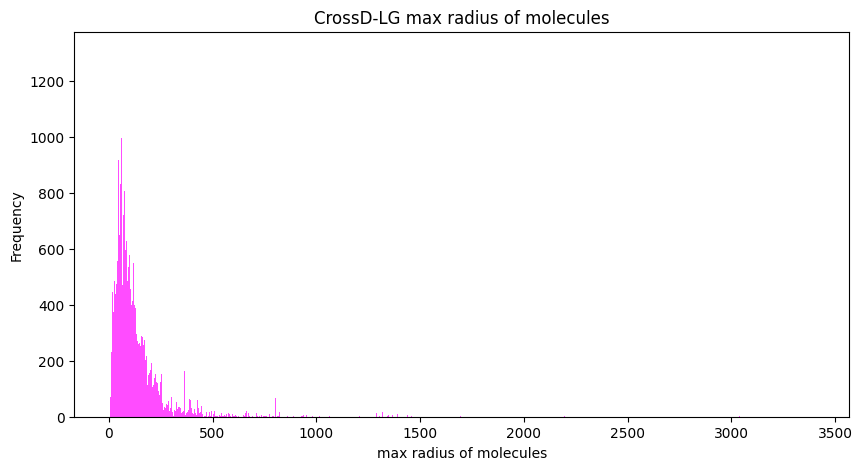

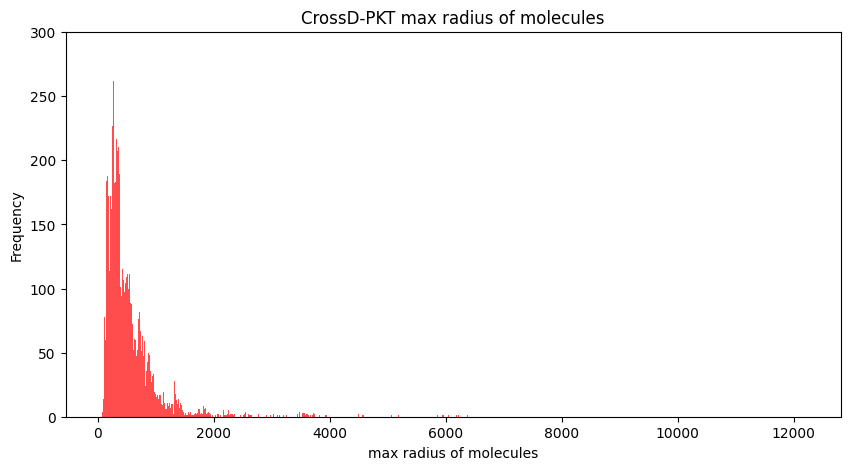

In [23]:
from utils import plot_histogram

plot_histogram(data_list=qm9_data_obj.radius_max, color=colors[0], label=list_of_all_dicts_names[0], xlabel='max radius of molecules', title='QM9 max radius of molecules', img_save_path='outputs/radius_max_hist_QM9.png')
plot_histogram(data_list=geom_data_obj.radius_max, color=colors[1], label=list_of_all_dicts_names[1], xlabel='max radius of molecules', title='GEOM max radius of molecules', img_save_path='outputs/radius_max_hist_GEOM.png')
plot_histogram(data_list=pdbbind_ligand_data_obj.radius_max, color=colors[2], label=list_of_all_dicts_names[2], xlabel='max radius of molecules', title='PDBB-LG max radius of molecules', img_save_path='outputs/radius_max_hist_PDBB-LG.png')
plot_histogram(data_list=pdbbind_pocket_data_obj.radius_max, color=colors[3], label=list_of_all_dicts_names[3], xlabel='max radius of molecules', title='PDBB-PKT max radius of molecules', img_save_path='outputs/radius_max_hist_PDBB-PKT.png')
plot_histogram(data_list=pdbbind_protein_data_obj.radius_max, color=colors[4], label=list_of_all_dicts_names[4], xlabel='max radius of molecules', title='PDBB-PTN max radius of molecules', img_save_path='outputs/radius_max_hist_PDBB-PTN.png')

plot_histogram(data_list=moad_ligand_data_obj.radius_max, color=colors[5], label=list_of_all_dicts_names[5], xlabel='max radius of molecules', title='MOAD-LG max radius of molecules', img_save_path='outputs/radius_max_hist_MOAD-LG.png')
plot_histogram(data_list=moad_pocket_data_obj.radius_max, color=colors[6], label=list_of_all_dicts_names[6], xlabel='max radius of molecules', title='MOAD-PKT max radius of molecules', img_save_path='outputs/radius_max_hist_MOAD-PKT.png')

plot_histogram(data_list=crossd_ligand_data_obj.radius_max, color=colors[7], label=list_of_all_dicts_names[7], xlabel='max radius of molecules', title='CrossD-LG max radius of molecules', img_save_path='outputs/radius_max_hist_CrossD-LG.png')
plot_histogram(data_list=crossd_pocket_data_obj.radius_max, color=colors[8], label=list_of_all_dicts_names[8], xlabel='max radius of molecules', title='CrossD-PKT max radius of molecules', img_save_path='outputs/radius_max_hist_CrossD-PKT.png')

/Users/gohyixian/Documents/GitHub/FYP/GeoLDM-edit/data_EDA/utils.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(img_save_path)
/Users/gohyixian/miniforge3/envs/geoldm/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


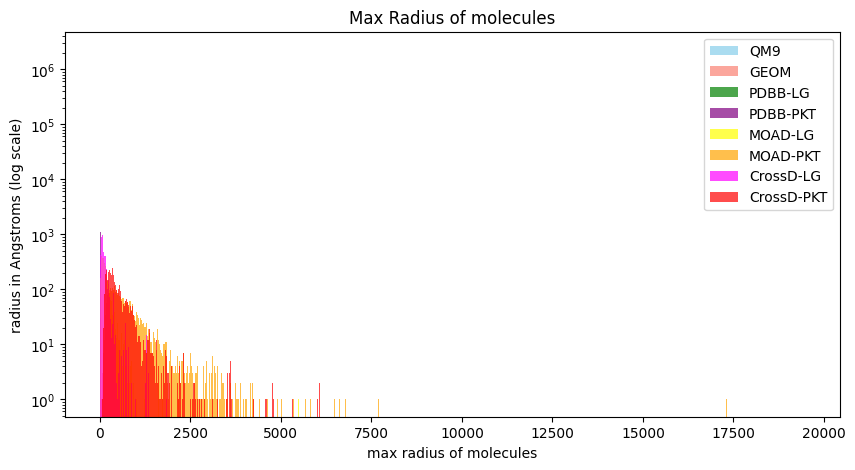

In [24]:
# this might take some time (PDBB-PTN)

from utils import plot_combined_histogram

plot_combined_histogram(data_max_radius[:4]+data_max_radius[5:], colors[:4]+colors[5:], list_of_all_dicts_names[:4]+list_of_all_dicts_names[5:], title='Max Radius of molecules', xlabel='max radius of molecules', ylabel='radius in Angstroms', img_save_path='outputs/radius_max_hist_ALL.png', log=True)

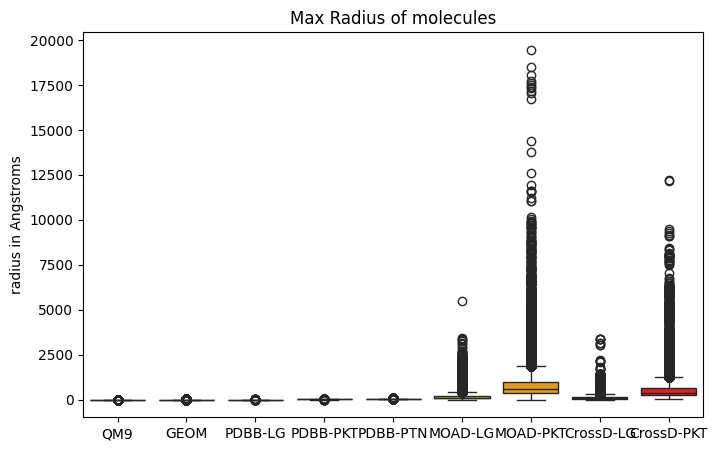

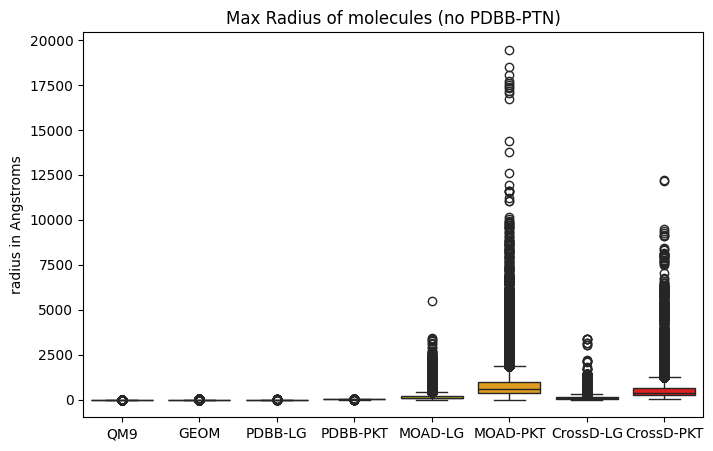

In [25]:
from utils import plot_combined_boxplot

plot_combined_boxplot(data_max_radius, colors, list_of_all_dicts_names, ylabel='radius in Angstroms', title='Max Radius of molecules', img_save_path='outputs/radius_max_box_ALL.png')
plot_combined_boxplot(data_max_radius[:4]+data_max_radius[5:], colors[:4]+colors[5:], list_of_all_dicts_names[:4]+list_of_all_dicts_names[5:], ylabel='radius in Angstroms', title='Max Radius of molecules (no PDBB-PTN)', img_save_path='outputs/radius_max_box_ALL_no_PDBB-PTN.png')


In [26]:
from utils import all_vs_all_welch_t_test

p_table_max_radius, t_table_mean_radius = all_vs_all_welch_t_test(data_max_radius, list_of_all_dicts_names, alpha=0.05)

print(p_table_max_radius, '\n\n', t_table_mean_radius)

# save to txt file
with open('outputs/radius_max_stats_t_test.txt', 'w') as f:
    print(p_table_max_radius, file=f)
    print('\n\n', file=f)
    print(t_table_mean_radius, file=f)


+----------------+-----------+------------------------------+------------------------------+-----------+-----------+-----------+-----------+-----------+------------+
| (P) Alpha:0.05 |    QM9    |             GEOM             |           PDBB-LG            |  PDBB-PKT |  PDBB-PTN |  MOAD-LG  |  MOAD-PKT | CrossD-LG | CrossD-PKT |
+----------------+-----------+------------------------------+------------------------------+-----------+-----------+-----------+-----------+-----------+------------+
|      QM9       |     -     |          0.0 (Sig)           |          0.0 (Sig)           | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig)  |
|      GEOM      | 0.0 (Sig) |              -               | 2.5437940759545487e-40 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig)  |
|    PDBB-LG     | 0.0 (Sig) | 2.5437940759545487e-40 (Sig) |              -               | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig)  |
|   